# Coding Hopfield Net from scratch

- Refer [this article](https://towardsdatascience.com/hopfield-networks-neural-memory-machines-4c94be821073)

In [2]:
import numpy as np
import random
import numpy.random as rnd
from numpy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import seaborn as sns
from scipy import ndimage
from hopfield_net_class import *
#for MNIST fetch
import requests, gzip, os, hashlib
from ipywidgets import interact
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

%matplotlib widget

plt.rcParams['font.family'] = 'Arial'

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# ## Off the shelf function to import MNIST dataset and converting it to binary data
# #Fetch MNIST dataset from the ~SOURCE~
# def fetch_MNIST(url):
#   fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
#   if os.path.isfile(fp):
#     with open(fp, "rb") as f:
#       dat = f.read()
#   else:
#     with open(fp, "wb") as f:
#       dat = requests.get(url).content
#       f.write(dat)
  
#   return np.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()



# def make_binary_MNIST(): #test out the Hopfield_Network object on some MNIST data
    
#     #fetch MNIST dataset for some random memory downloads
#     X = fetch_MNIST(
#         "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
#         )[0x10:].reshape((-1, 28**2))
    
#     #convert to binary
#     X_binary = np.where(X>50, 1,-1)
#     return X_binary

# def pick_patterns(X_binary, num_patterns):
#   '''Picks two num_patterns random patterns from binary MNIST dataset'''
#   random_indices = rnd.randint(0, X_binary.shape[1], num_patterns)

#   # initialize a matrix to store the random patterns. dimension: num_patterns x num_neurons (784)
#   patterns_mat = np.zeros((num_patterns, X_binary.shape[1]))

#   # set up a for loop and append the patterns in the numpy array
#   for i in range(num_patterns):
#     patterns_mat[i, :] = X_binary[random_indices[i], :]

#   return patterns_mat

# ## Make a function to move the images towards the left or right boundaries
# def shift_image(im, direction):
#   '''
#   Moves the image im (28, 28) to left or right
#   direction: string, 'l' or 'r' for left and right respectively
#   '''
#   if im.shape != (28, 28):
#     raise Exception("The dimension of input image is not (28, 28)")
  
#   if direction == 'r':
#     im_trunc = im[:, 24:]
#     im = np.concatenate((im_trunc, im[:, :23]), axis = 1)

#   else:
#     im_trunc = im[:, :3]
#     im = np.concatenate((im[:, 4:], im_trunc),  axis= 1)
    
#   return im

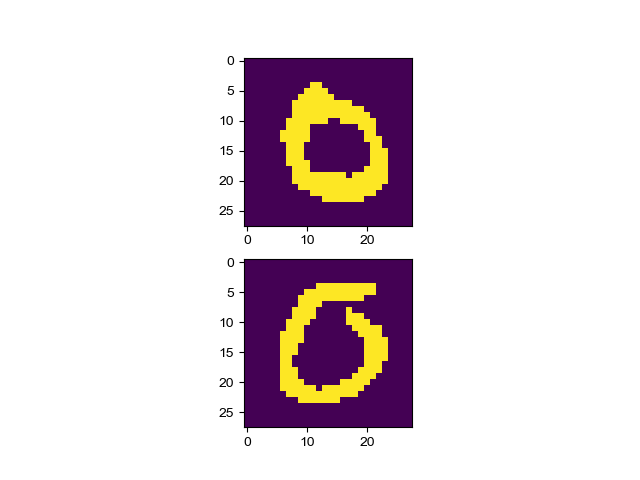

In [3]:
# preliminary analysis and pilot runs

x_bin = make_binary_MNIST()
patterns = pick_patterns(x_bin, 2)

# plot the patterns
fig, ax = plt.subplots(patterns.shape[0], 1)

for i, axs in zip(range(patterns.shape[0]), ax.flat):
    im = axs.imshow(patterns[i, :].reshape(28, 28))


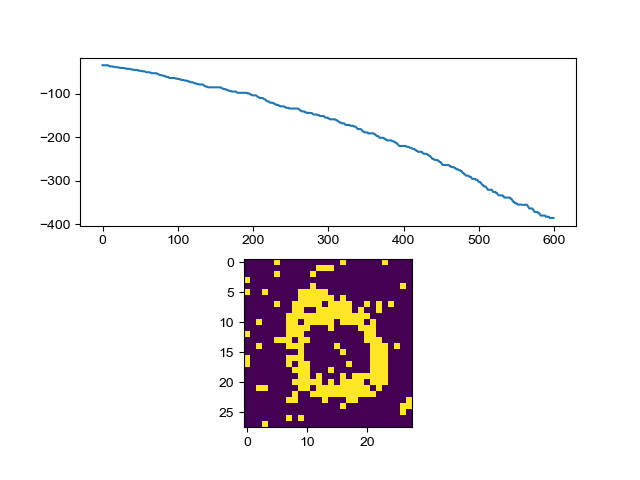

In [4]:
h1 = Hopfield_Net(patterns)
# w1 = h1.compute_weights()
iterations = 600
updated_states1, energy1 = h1.update_network_state(iterations)

# plot the updated states and energy
fig, ax = plt.subplots(2,1)
ax[0].plot(np.arange(iterations), energy1)
ax[1].imshow(updated_states1.reshape(28,28))

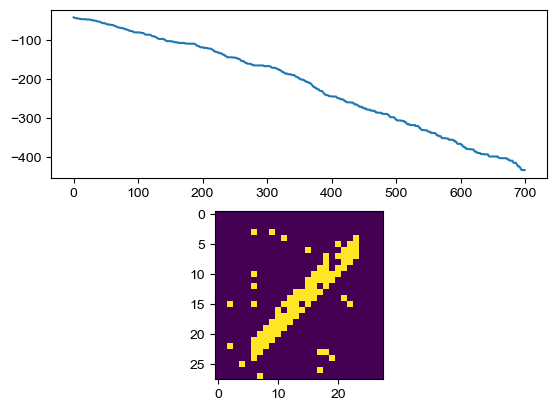

In [4]:
x_bin = make_binary_MNIST()
patterns = pick_patterns(x_bin, 2)

h2 = Hopfield_Net(patterns)
iterations = 700
updated_states2, energy2 = h2.update_network_state(iterations)

# plot the updated states and energy
fig, ax = plt.subplots(2,1)
ax[0].plot(np.arange(iterations), energy2)
ax[1].imshow(updated_states2.reshape(28,28))

In [ ]:
## trying to make an animate function
mem_pattern = pick_patterns(x_bin, 2)

h3 = Hopfield_Net(mem_pattern)
num_itr = 3000

states_mat = np.empty([784, num_itr], dtype=np.int16)
im_mat = []
energy_arr = []
fig = plt.figure()

for i in range(num_itr):
    states, energy = h3.update_network_state(1)
    states_mat[:, i] = states
    energy_arr.append(energy[-1])
    im = plt.imshow(states_mat[:, i].reshape(28, 28))
    im_mat.append([im])

ani = animation.ArtistAnimation(fig, im_mat, interval=2, blit=True, repeat_delay=1000)
ani.save('update_with_replacement.mp4')


plt.figure()
plt.plot(energy_arr)
plt.xlabel('Iterations')
plt.ylabel('Energy')
# plt.figure()
# plt.imshow(states_mat[:, 0].reshape(28,28))
# plt.figure()
# plt.imshow(states_mat[:, -1].reshape(28,28))


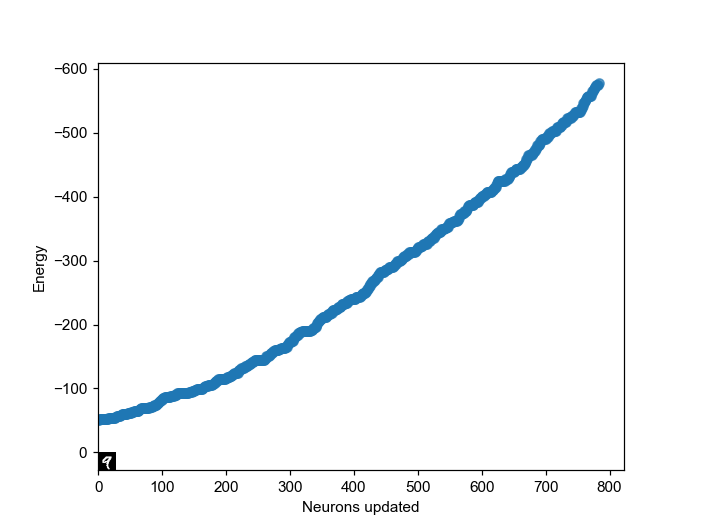

In [7]:
## trying out the new update_neuron_state function: working script, just uncomment the for loop to save the video
patterns4 = pick_fixed_patterns(x_bin, [4, 5], 2)

flip_p4 = corrupt_input(patterns4[0, :], 0.35)

num_itr = 784

h4 = Hopfield_Net(patterns4, flip_p4)

# update fraction f of neuron states without replacement
f = 1
num_neurons = np.ceil(f*h4.num_neurons)

# generate a random sequence of neurons with length num_neurons
rand_neuron_num = rnd.choice(h4.num_neurons, size = np.int16(num_neurons) ,replace=False)

# make fig and ax
fig, ax = plt.subplots(dpi=110)

# initialize states and image containers
states_mat = np.empty([784, num_itr], dtype=np.int16)
im_mat = []
energy_arr = []

# iterate one neuron at a time to update the states
for n, i in zip(rand_neuron_num, np.arange(rand_neuron_num.shape[0])):
    states, energy = h4.update_neuron_state(n)
    energy_arr.append(energy)
    states_mat[:, i] = states
    im = ax.imshow(states_mat[:,i].reshape(28, 28), animated=True, cmap='Greys_r')
    im_mat.append([im])

ani = animation.ArtistAnimation(fig, im_mat, interval=10, blit=True, repeat_delay=1000)
ani.save('update_state_0_4.mp4')

plt.plot(energy_arr, lw=0.5, marker='o', alpha=.7)
plt.xlabel('Neurons updated')
plt.ylabel('Energy')
plt.show()

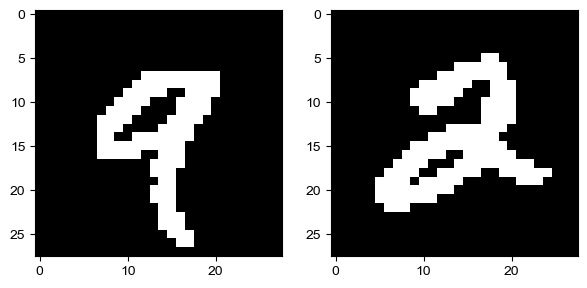

In [108]:
## plot out the above patterns
fig, ax = plt.subplots(1,2, figsize=(7, 3.5))

for i, axs in zip(np.arange(2), ax.flat):
    axs.imshow(patterns4[i, :].reshape(28, 28), cmap='Greys_r')

plt.savefig('opening_exp_patterns.png', dpi=300, bbox_inches='tight')

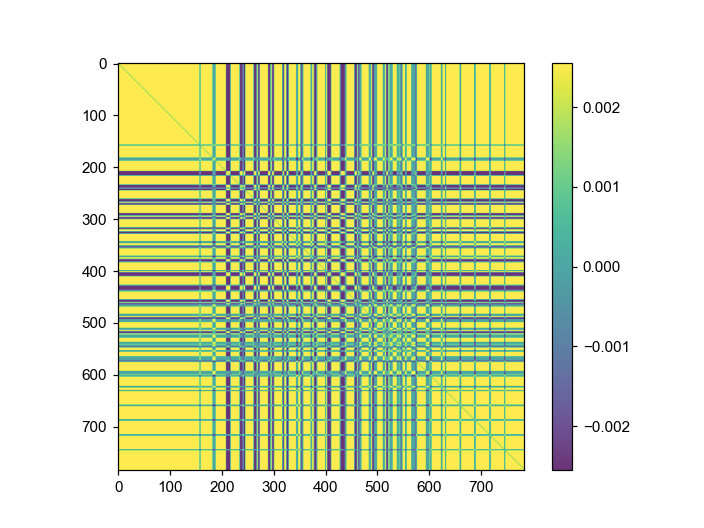

In [21]:
# plotting weights for these patterns
fig, ax = plt.subplots(dpi=110)
im92 = ax.imshow(h4.weights, cmap='viridis', alpha=.8)
cbar = ax.figure.colorbar(im92, ax=ax)
fig.savefig('weights_9_2.png', dpi=300, transparent=True)
plt.show()

Text(0.5, 1.0, 'Recalled memory')

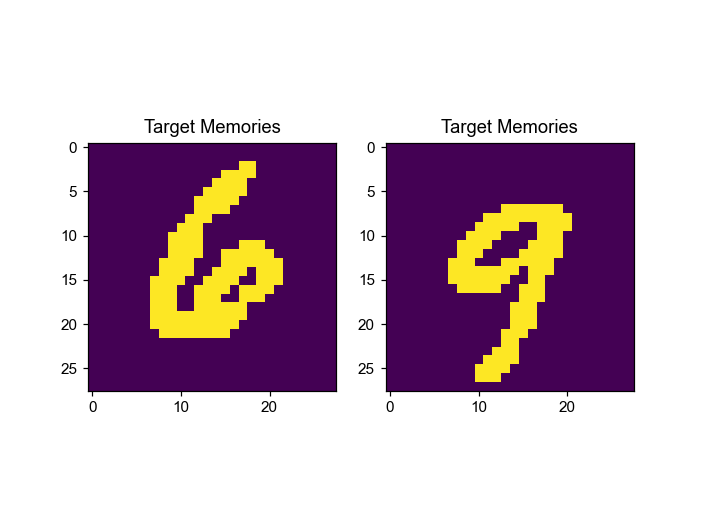

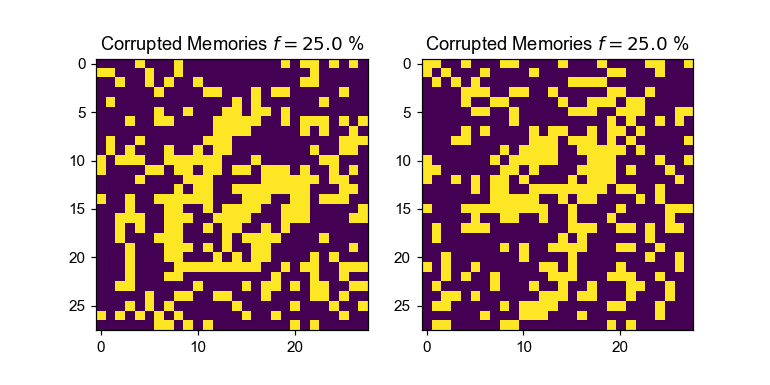

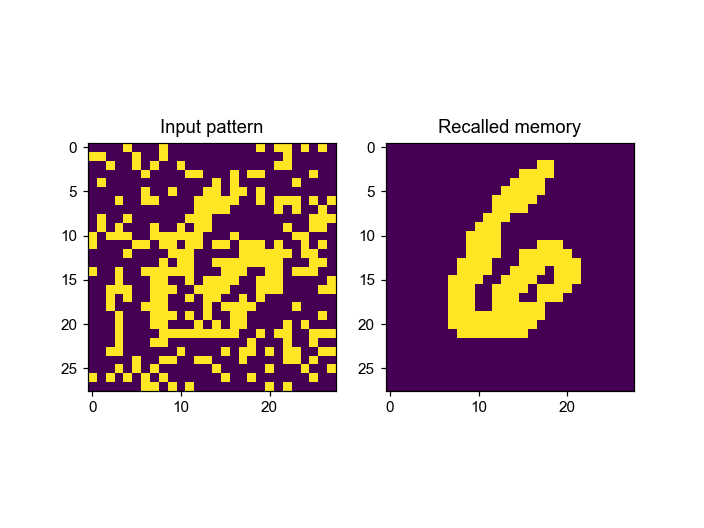

In [10]:
## try to make the network converge to one of two memories

# pick two random memories
mem_patterns = pick_fixed_patterns(x_bin, [13,45], 2)

# plot the target patterns
fig1, ax1 = plt.subplots(1,2, dpi=110)
for i, axs in zip(np.arange(2), ax1.flat):
    im = axs.imshow(mem_patterns[i, :].reshape(28,28))
    axs.set_title('Target Memories')

## generate corrupted images, flip 40% of the bits in each memory
# pick out the memories
mem_pattern1 = np.copy(mem_patterns[0, :])
mem_pattern2 = np.copy(mem_patterns[1, :])

# corrupt both of them
frac_flip = 0.25 # fraction of bits to be flipped
corrupt_idx1 = rnd.choice(mem_pattern1.shape[0], np.int16(np.floor(frac_flip*mem_pattern1.shape[0])), replace=False)
# print(corrupt_idx1)
corrupt_idx2 = rnd.choice(mem_pattern2.shape[0], np.int16(np.floor(frac_flip*mem_pattern2.shape[0])), replace=False)
# print(corrupt_idx2)

# create the corrupted memories
corr_mem_pattern1 = np.copy(mem_pattern1)
corr_mem_pattern2 = np.copy(mem_pattern2)
corr_mem_pattern1[corrupt_idx1] = -corr_mem_pattern1[corrupt_idx1]
corr_mem_pattern2[corrupt_idx2] = -corr_mem_pattern2[corrupt_idx2]

# concatenate the memory patterns into a matrix
corr_mem_mat = np.stack((corr_mem_pattern1, corr_mem_pattern2))

# plot out the corrupted memories
fig2, ax2 = plt.subplots(1,2, dpi=110, figsize=(7, 3.5))
for i, axs in zip(np.arange(2), ax2.flat):
    im = axs.imshow(corr_mem_mat[i, :].reshape(28,28))
    axs.set_title(f'Corrupted Memories $f = {frac_flip*100}$ %')

## see if the network converges to these memories

# convergence to first target memory
h1 = Hopfield_Net(mem_patterns)

# manually set the initial states as the corrupted states
corr_input = np.copy(corr_mem_pattern1)
h1.neuron_states = np.copy(corr_input)
# h1.neuron_states = mem_pattern2

# get the final updated states
num_neurons = 784
final_states1, energy1 = h1.update_network_state(num_neurons)
# final_states2, energy2 = h2.update_network_state(num_neurons)

# concatenate the final patterns

# plot out the recalled memories
fig3, ax3 = plt.subplots(1,2, dpi=110)
im1 = ax3[0].imshow(corr_input.reshape(28,28))
im2 = ax3[1].imshow(h1.neuron_states.reshape(28,28))
ax3[0].set_title('Input pattern')
ax3[1].set_title(f'Recalled memory')

(28, 28)
(28, 28)


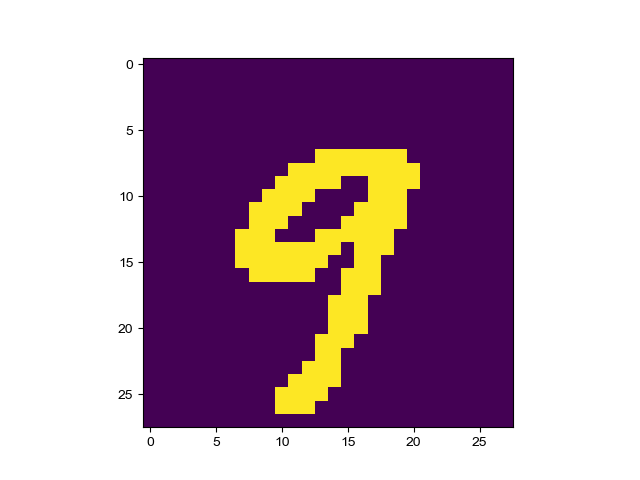

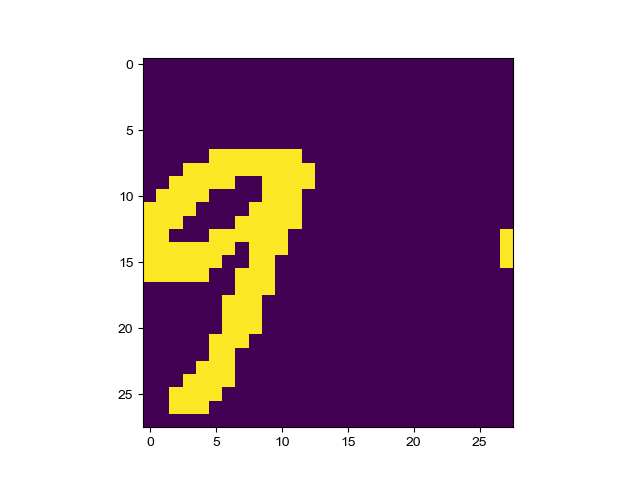

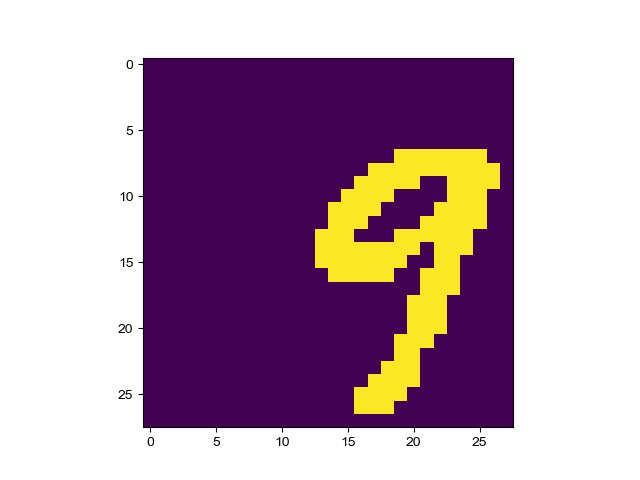

In [11]:
# testing out the shift function: the function works
im = mem_pattern2.reshape(28,28)
im_left = shift_image(im, 'l')
im_right = shift_image(im, 'r')

print(im_left.shape)

print(im_right.shape)

plt.figure()
plt.imshow(im)
plt.figure()
plt.imshow(im_left)
plt.figure()
plt.imshow(im_right)

# analysis for energy

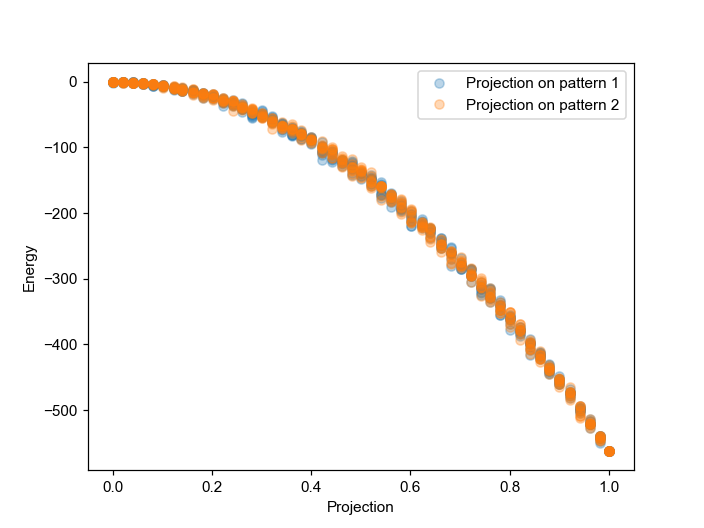

In [112]:
# pick two fixed patterns
fixed_patterns = pick_fixed_patterns(x_bin, [13, 45], 2)
pattern1 = fixed_patterns[0, :]
pattern2 = fixed_patterns[1,:]

# define an array that specifies the fraction of pixels flipped
f_array = np.arange(0., 0.501, 0.01)

# define iterations for each run
itr = 10

# create an array to store the energies
energy_list1 = []
energy_list2 = []

# create an empty array to store the projections
proj1_list = []#np.empty(f_array.shape[0]**2*itr)
proj2_list = []#np.empty(f_array.shape[0]**2*itr)

# create an object and imprint the patterns
h_energy = Hopfield_Net(fixed_patterns)

# iterate over the peojections and compute the energy

## first iterate over pattern 1
for i in range(itr):
    for f in f_array:
        # cprr_p1 = np.copy(pattern1)
        corr_p1 = corrupt_input(pattern1, f)
        plt.imshow(corr_p1.reshape(28,28))
        proj1 = np.dot(pattern1, corr_p1)/(linalg.norm(pattern1)*linalg.norm(corr_p1))
        proj1_list.append(proj1)
        e1 = h_energy.compute_energy(corr_p1)
        energy_list1.append(e1)

## first iterate over pattern 2
for i in range(itr):
    for f in f_array:
        # cprr_p2 = np.copy(pattern2)
        corr_p2 = corrupt_input(pattern2, f)
        proj2 = np.dot(pattern2, corr_p2)/(linalg.norm(pattern2)*linalg.norm(corr_p2))
        proj2_list.append(proj2)
        e2 = h_energy.compute_energy(corr_p2)
        energy_list2.append(e2)


fig, ax = plt.subplots(dpi = 110)
ax.plot(proj1_list, energy_list1, marker='o', lw=0, alpha=.3, label='Projection on pattern 1')
ax.plot(proj2_list, energy_list2, marker='o', lw=0, alpha=.3, label='Projection on pattern 2')
ax.set_xlabel('Projection')
ax.set_ylabel('Energy')
ax.legend()


# for i in range(itr):
#     corr_p1 = np.copy(pattern1)
#     corr_p2 = np.copy(pattern2)
#     for j in range(f_array.shape[0]):
#         corr_p1 = corrupt_input(corr_p1, f_array[j])
#         proj1 = np.dot(pattern1, corr_p1)/np.sqrt((np.dot(pattern1, corr_p1)))
#         proj1_list.append(proj1)
#         e1 = h_energy.compute_energy(corr_p1)
#         energy_list.append(e1)
#         for k in range(f_array.shape[0]):
#             corr_p2 = corrupt_input(corr_p2, f_array[k])
#             proj2 = np.dot(pattern2, corr_p2)/np.sqrt((np.dot(pattern2, corr_p2)))
#             # compute energy
#             e2 = h_energy.compute_energy(corr_p2)

#             # append to list
#             proj1_list.append(proj1)
#             proj2_list.append(proj2)
#             energy_list.append(e2)

# print(len(proj1_list), len(proj2_list), len(energy_list))




- Pick a pattern. Flip some pixels. Find it's projection on both the stored patterns and save the energy corresponding to it.

2020
4020


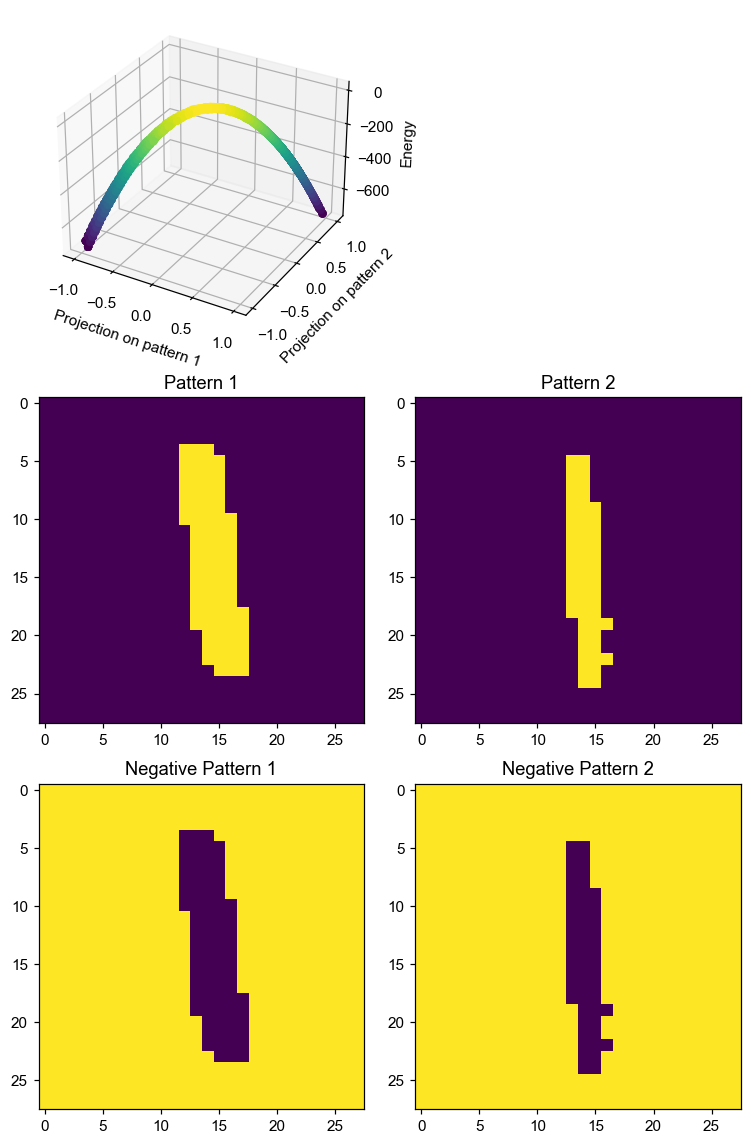

interactive(children=(IntSlider(value=180, description='angle', max=360), Output()), _dom_classes=('widget-int…

In [6]:
# pick two fixed patterns
fixed_patterns = pick_fixed_patterns(x_bin, [6, 8], 2)
pattern1 = fixed_patterns[0, :]
pattern2 = fixed_patterns[1,:]

## check the patterns
# fig, ax = plt.subplots(1,2)
# ax[0].imshow(pattern1.reshape(28,28))
# ax[1].imshow(pattern2.reshape(28,28))

# define an array that specifies the fraction of pixels flipped
f_array = np.arange(0., 1.01, 0.01)

# define iterations for each run
itr = 10

# create an array to store the energies
energy_list = []


# create an empty array to store the projections
proj_on_1_list = []#np.empty(f_array.shape[0]**2*itr)
proj_on_2_list = []#np.empty(f_array.shape[0]**2*itr)

# create an object and imprint the patterns
h_energy = Hopfield_Net(fixed_patterns)


## Going one pattern at a time
for i in range(itr):
    for f1 in f_array:
        # flip bits
        corr_p1 = corrupt_input(pattern1, f1)

        # project corr_p1 on p1
        proj1_1 = np.dot(pattern1, corr_p1)/(linalg.norm(pattern1)*linalg.norm(corr_p1))
        # project corr_p1 on p2
        proj1_2 = np.dot(pattern2, corr_p1)/(linalg.norm(pattern2)*linalg.norm(corr_p1))
        # compute the energy of corr_p1
        e1 = h_energy.compute_energy(corr_p1)
        # append to the right arrays
        proj_on_1_list.append(proj1_1)
        proj_on_2_list.append(proj1_2)
        energy_list.append(e1)

# repeat for pattern 2
for i in range(itr):
    for f2 in f_array:
        # flip bits
        corr_p2 = corrupt_input(pattern2, f2)

        # project corr_p2 on p1
        proj1_1 = np.dot(pattern1, corr_p2)/(linalg.norm(pattern1)*linalg.norm(corr_p2))
        # project corr_p2 on p2
        proj1_2 = np.dot(pattern2, corr_p2)/(linalg.norm(pattern2)*linalg.norm(corr_p2))
        # compute the energy of corr_p1
        e2 = h_energy.compute_energy(corr_p2)
        # append to the right arrays
        proj_on_1_list.append(proj1_1)
        proj_on_2_list.append(proj1_2)
        energy_list.append(e2)

print(len(proj_on_1_list))

# repeat for randomly chosen MNIST digits
for i in range(2000):
    # pick other patterns and check their projections
    rand_pattern = pick_patterns(x_bin, 1)
    rand_pattern = rand_pattern[0, :]
    # corr_p2 = corrupt_input(rand_pattern, f2)

    # project corr_p2 on p1
    proj1_1 = np.dot(pattern1, rand_pattern)/(linalg.norm(pattern1)*linalg.norm(rand_pattern))
    # project corr_p2 on p2
    proj1_2 = np.dot(pattern2, rand_pattern)/(linalg.norm(pattern2)*linalg.norm(rand_pattern))
    # compute the energy of corr_p1
    e2 = h_energy.compute_energy(rand_pattern)
    # append to the right arrays
    proj_on_1_list.append(proj1_1)
    proj_on_2_list.append(proj1_2)
    energy_list.append(e2)

# # repeat for randomly chosen MNIST digits but now flip 40% of the bits
# for i in range(2000):
#     # pick other patterns and check their projections
#     rand_pattern = pick_patterns(x_bin, 1)
#     rand_pattern = rand_pattern[0, :]
#     corr_rand = corrupt_input(rand_pattern, 0.2)

#     # project corr_p2 on p1
#     proj1_1 = np.dot(pattern1, rand_pattern)/(linalg.norm(pattern1)*linalg.norm(corr_rand))
#     # project corr_p2 on p2
#     proj1_2 = np.dot(pattern2, rand_pattern)/(linalg.norm(pattern2)*linalg.norm(corr_rand))
#     # compute the energy of corr_p1
#     e2 = h_energy.compute_energy(corr_rand)
#     # append to the right arrays
#     proj_on_1_list.append(proj1_1)
#     proj_on_2_list.append(proj1_2)
#     energy_list.append(e2)


# # repeat for randomly chosen MNIST digits but now flip 100% of the bits -- negative images
# for i in range(2000):
#     # pick other patterns and check their projections
#     rand_pattern = pick_patterns(x_bin, 1)
#     rand_pattern = rand_pattern[0, :]
#     corr_rand = corrupt_input(rand_pattern, 1)

#     # project corr_p2 on p1
#     proj1_1 = np.dot(pattern1, rand_pattern)/(linalg.norm(pattern1)*linalg.norm(corr_rand))
#     # project corr_p2 on p2
#     proj1_2 = np.dot(pattern2, rand_pattern)/(linalg.norm(pattern2)*linalg.norm(corr_rand))
#     # compute the energy of corr_p1
#     e2 = h_energy.compute_energy(corr_rand)
#     # append to the right arrays
#     proj_on_1_list.append(proj1_1)
#     proj_on_2_list.append(proj1_2)
#     energy_list.append(e2)

# repeat for random inputs -- noise basically! -- just adds points near the top :(
# for i in range(1000):
#     # pick other patterns and check their projections
#     rand_pattern = rnd.rand(pattern1.shape[0])
#     # rand_pattern = rand_pattern[0, :]
#     # corr_p2 = corrupt_input(rand_pattern, f2)

#     # project corr_p2 on p1
#     proj1_1 = np.dot(pattern1, corr_p2)/(linalg.norm(pattern1)*linalg.norm(rand_pattern))
#     # project corr_p2 on p2
#     proj1_2 = np.dot(pattern2, corr_p2)/(linalg.norm(pattern2)*linalg.norm(rand_pattern))
#     # compute the energy of corr_p1
#     e2 = h_energy.compute_energy(rand_pattern)
#     # append to the right arrays
#     proj_on_1_list.append(proj1_1)
#     proj_on_2_list.append(proj1_2)
#     energy_list.append(e2)

print(len(proj_on_1_list))
proj_on_1_list = np.array(proj_on_1_list)
proj_on_2_list = np.array(proj_on_2_list)
energy_list = np.array(energy_list)

fig = plt.figure(dpi=110, figsize=(7, 10.5))
ax = fig.add_subplot(321, projection='3d')
ax.scatter(proj_on_1_list, proj_on_2_list, energy_list, c=energy_list)
ax.set_xlabel('Projection on pattern 1')
ax.set_ylabel('Projection on pattern 2')
ax.set_zlabel('Energy')
fig.tight_layout()

ax2 = fig.add_subplot(323)
ax2.imshow(pattern1.reshape(28,28))
ax2.set_title('Pattern 1')

ax3 = fig.add_subplot(324)
ax3.imshow(pattern2.reshape(28,28))
ax3.set_title('Pattern 2')

ax4 = fig.add_subplot(325)
ax4.imshow(corr_p1.reshape(28,28))
ax4.set_title('Negative Pattern 1')

ax5 = fig.add_subplot(326)
ax5.imshow(corr_p2.reshape(28,28))
ax5.set_title('Negative Pattern 2')

fig.tight_layout()

# fig.savefig('energy_close_patterns.png', dpi=300, transparent=False, bbox_inches='tight')

@interact(angle=(0, 360))
def update_plot(angle):
    ax.view_init(azim=angle)
    fig.canvas.draw()



2020
6020


interactive(children=(IntSlider(value=180, description='angle', max=360), Output()), _dom_classes=('widget-int…

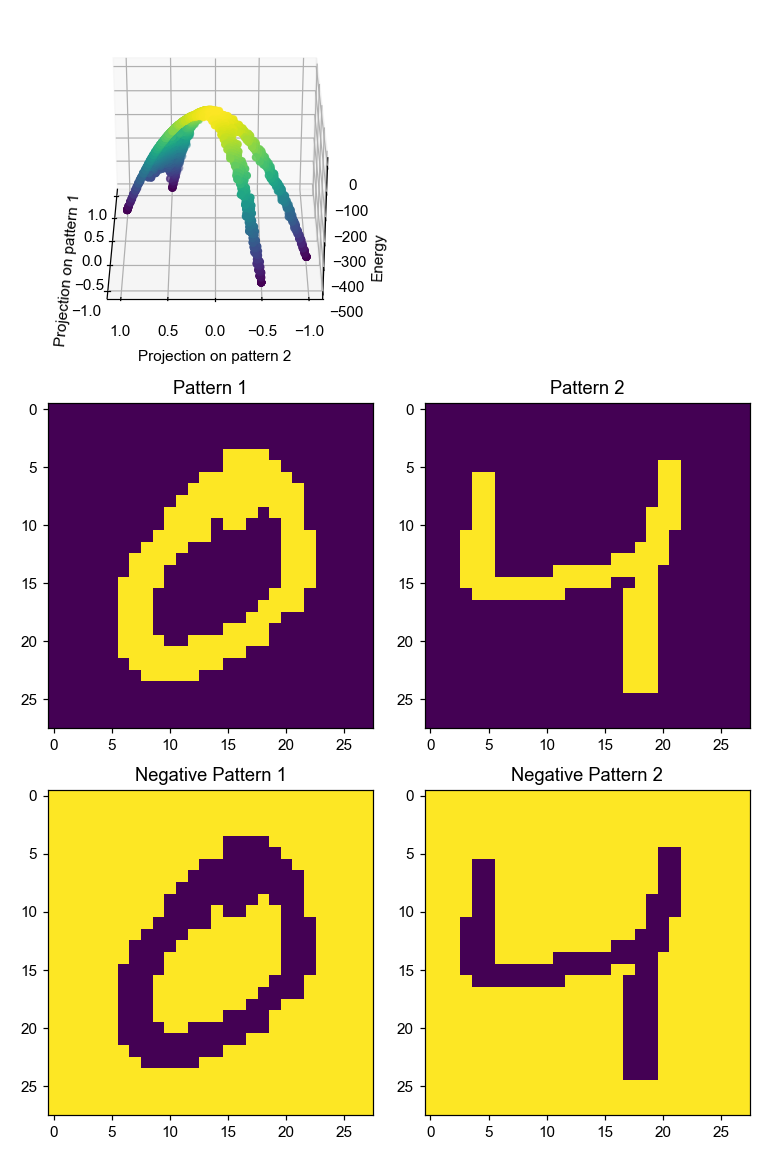

In [116]:
# pick two fixed patterns
fixed_patterns = pick_fixed_patterns(x_bin, [1, 2], 2)
pattern1 = fixed_patterns[0, :]
pattern2 = fixed_patterns[1,:]

## check the patterns
# fig, ax = plt.subplots(1,2)
# ax[0].imshow(pattern1.reshape(28,28))
# ax[1].imshow(pattern2.reshape(28,28))

# define an array that specifies the fraction of pixels flipped
f_array = np.arange(0., 1.01, 0.01)

# define iterations for each run
itr = 10

# create an array to store the energies
energy_list = []


# create an empty array to store the projections
proj_on_1_list = []#np.empty(f_array.shape[0]**2*itr)
proj_on_2_list = []#np.empty(f_array.shape[0]**2*itr)

# create an object and imprint the patterns
h_energy = Hopfield_Net(fixed_patterns)


## Going one pattern at a time
for i in range(itr):
    for f1 in f_array:
        # flip bits
        corr_p1 = corrupt_input(pattern1, f1)

        # project corr_p1 on p1
        proj1_1 = np.dot(pattern1, corr_p1)/(linalg.norm(pattern1)*linalg.norm(corr_p1))
        # project corr_p1 on p2
        proj1_2 = np.dot(pattern2, corr_p1)/(linalg.norm(pattern2)*linalg.norm(corr_p1))
        # compute the energy of corr_p1
        e1 = h_energy.compute_energy(corr_p1)
        # append to the right arrays
        proj_on_1_list.append(proj1_1)
        proj_on_2_list.append(proj1_2)
        energy_list.append(e1)

# repeat for pattern 2
for i in range(itr):
    for f2 in f_array:
        # flip bits
        corr_p2 = corrupt_input(pattern2, f2)

        # project corr_p2 on p1
        proj1_1 = np.dot(pattern1, corr_p2)/(linalg.norm(pattern1)*linalg.norm(corr_p2))
        # project corr_p2 on p2
        proj1_2 = np.dot(pattern2, corr_p2)/(linalg.norm(pattern2)*linalg.norm(corr_p2))
        # compute the energy of corr_p1
        e2 = h_energy.compute_energy(corr_p2)
        # append to the right arrays
        proj_on_1_list.append(proj1_1)
        proj_on_2_list.append(proj1_2)
        energy_list.append(e2)

print(len(proj_on_1_list))

# repeat for randomly chosen MNIST digits
for i in range(2000):
    # pick other patterns and check their projections
    rand_pattern = pick_patterns(x_bin, 1)
    rand_pattern = rand_pattern[0, :]
    # corr_p2 = corrupt_input(rand_pattern, f2)

    # project corr_p2 on p1
    proj1_1 = np.dot(pattern1, rand_pattern)/(linalg.norm(pattern1)*linalg.norm(rand_pattern))
    # project corr_p2 on p2
    proj1_2 = np.dot(pattern2, rand_pattern)/(linalg.norm(pattern2)*linalg.norm(rand_pattern))
    # compute the energy of corr_p1
    e2 = h_energy.compute_energy(rand_pattern)
    # append to the right arrays
    proj_on_1_list.append(proj1_1)
    proj_on_2_list.append(proj1_2)
    energy_list.append(e2)

# # repeat for randomly chosen MNIST digits but now flip 40% of the bits
# for i in range(2000):
#     # pick other patterns and check their projections
#     rand_pattern = pick_patterns(x_bin, 1)
#     rand_pattern = rand_pattern[0, :]
#     corr_rand = corrupt_input(rand_pattern, 0.2)

#     # project corr_p2 on p1
#     proj1_1 = np.dot(pattern1, rand_pattern)/(linalg.norm(pattern1)*linalg.norm(corr_rand))
#     # project corr_p2 on p2
#     proj1_2 = np.dot(pattern2, rand_pattern)/(linalg.norm(pattern2)*linalg.norm(corr_rand))
#     # compute the energy of corr_p1
#     e2 = h_energy.compute_energy(corr_rand)
#     # append to the right arrays
#     proj_on_1_list.append(proj1_1)
#     proj_on_2_list.append(proj1_2)
#     energy_list.append(e2)


# repeat for randomly chosen MNIST digits but now flip 100% of the bits -- negative images
for i in range(2000):
    # pick other patterns and check their projections
    rand_pattern = pick_patterns(x_bin, 1)
    rand_pattern = rand_pattern[0, :]
    corr_rand = -rand_pattern #corrupt_input(rand_pattern, 1)

    # project corr_p2 on p1
    proj1_1 = np.dot(pattern1, rand_pattern)/(linalg.norm(pattern1)*linalg.norm(corr_rand))
    # project corr_p2 on p2
    proj1_2 = np.dot(pattern2, rand_pattern)/(linalg.norm(pattern2)*linalg.norm(corr_rand))
    # compute the energy of corr_p1
    e2 = h_energy.compute_energy(corr_rand)
    # append to the right arrays
    proj_on_1_list.append(proj1_1)
    proj_on_2_list.append(proj1_2)
    energy_list.append(e2)

# repeat for random inputs -- noise basically! -- just adds points near the top :(
# for i in range(1000):
#     # pick other patterns and check their projections
#     rand_pattern = rnd.rand(pattern1.shape[0])
#     # rand_pattern = rand_pattern[0, :]
#     # corr_p2 = corrupt_input(rand_pattern, f2)

#     # project corr_p2 on p1
#     proj1_1 = np.dot(pattern1, corr_p2)/(linalg.norm(pattern1)*linalg.norm(rand_pattern))
#     # project corr_p2 on p2
#     proj1_2 = np.dot(pattern2, corr_p2)/(linalg.norm(pattern2)*linalg.norm(rand_pattern))
#     # compute the energy of corr_p1
#     e2 = h_energy.compute_energy(rand_pattern)
#     # append to the right arrays
#     proj_on_1_list.append(proj1_1)
#     proj_on_2_list.append(proj1_2)
#     energy_list.append(e2)

print(len(proj_on_1_list))
proj_on_1_list = np.array(proj_on_1_list)
proj_on_2_list = np.array(proj_on_2_list)
energy_list = np.array(energy_list)

fig = plt.figure(dpi=110, figsize=(7, 10.5))
ax = fig.add_subplot(321, projection='3d')
ax.scatter(proj_on_1_list, proj_on_2_list, energy_list, c=energy_list)
ax.set_xlabel('Projection on pattern 1')
ax.set_ylabel('Projection on pattern 2')
ax.set_zlabel('Energy')
fig.tight_layout()

ax2 = fig.add_subplot(323)
ax2.imshow(pattern1.reshape(28,28))
ax2.set_title('Pattern 1')

ax3 = fig.add_subplot(324)
ax3.imshow(pattern2.reshape(28,28))
ax3.set_title('Pattern 2')

ax4 = fig.add_subplot(325)
ax4.imshow(corr_p1.reshape(28,28))
ax4.set_title('Negative Pattern 1')

ax5 = fig.add_subplot(326)
ax5.imshow(corr_p2.reshape(28,28))
ax5.set_title('Negative Pattern 2')

fig.tight_layout()

# fig.savefig('energy_different_patterns.png', dpi=300, transparent=False, bbox_inches='tight')

@interact(angle=(0, 360))
def update_plot(angle):
    ax.view_init(azim=angle)
    fig.canvas.draw()

plt.show()


2020
6020


/var/folders/ll/h6rw2gtd69710246lczqf90c0000gn/T/ipykernel_4196/94392998.py:143: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(dpi=110, figsize=(7, 10.5))


interactive(children=(IntSlider(value=180, description='angle', max=360), Output()), _dom_classes=('widget-int…

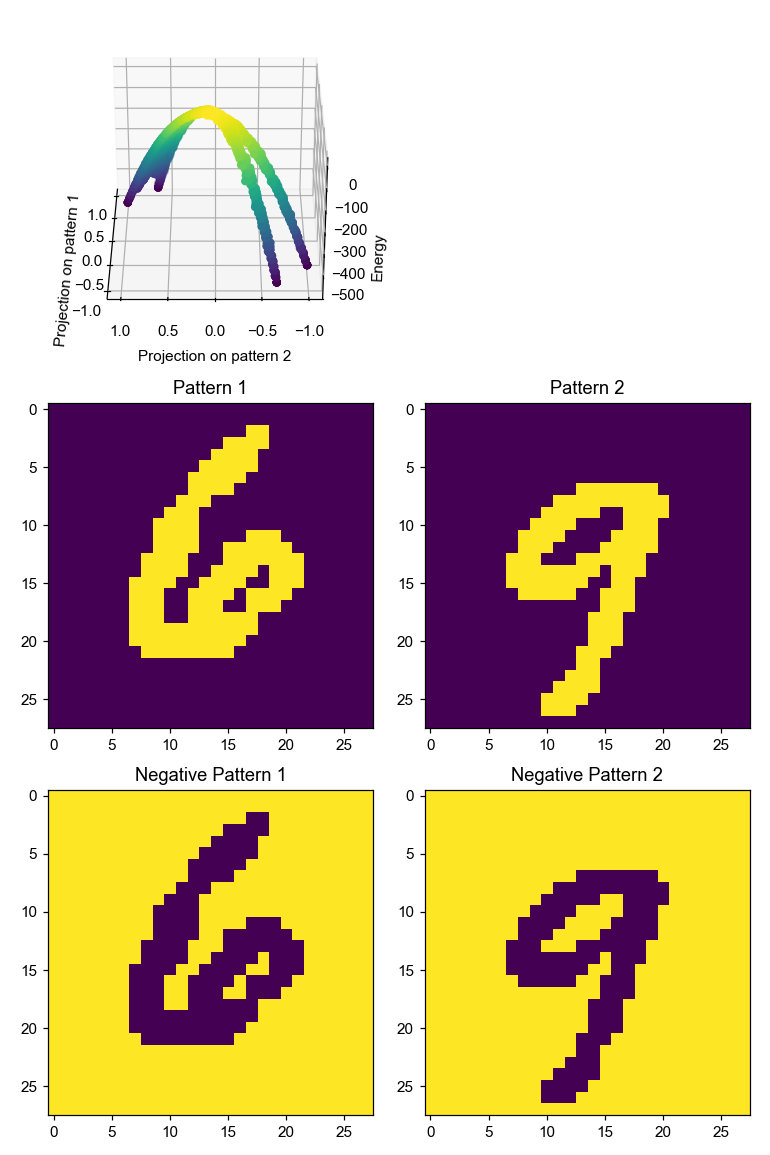

In [130]:
# pick two fixed patterns
fixed_patterns = pick_fixed_patterns(x_bin, [13, 45], 2)
pattern1 = fixed_patterns[0, :]
pattern2 = fixed_patterns[1,:]

## check the patterns
# fig, ax = plt.subplots(1,2)
# ax[0].imshow(pattern1.reshape(28,28))
# ax[1].imshow(pattern2.reshape(28,28))

# define an array that specifies the fraction of pixels flipped
f_array = np.arange(0., 1.01, 0.01)

# define iterations for each run
itr = 10

# create an array to store the energies
energy_list = []


# create an empty array to store the projections
proj_on_1_list = []#np.empty(f_array.shape[0]**2*itr)
proj_on_2_list = []#np.empty(f_array.shape[0]**2*itr)

# create an object and imprint the patterns
h_energy = Hopfield_Net(fixed_patterns)


## Going one pattern at a time
for i in range(itr):
    for f1 in f_array:
        # flip bits
        corr_p1 = corrupt_input(pattern1, f1)

        # project corr_p1 on p1
        proj1_1 = np.dot(pattern1, corr_p1)/(linalg.norm(pattern1)*linalg.norm(corr_p1))
        # project corr_p1 on p2
        proj1_2 = np.dot(pattern2, corr_p1)/(linalg.norm(pattern2)*linalg.norm(corr_p1))
        # compute the energy of corr_p1
        e1 = h_energy.compute_energy(corr_p1)
        # append to the right arrays
        proj_on_1_list.append(proj1_1)
        proj_on_2_list.append(proj1_2)
        energy_list.append(e1)

# repeat for pattern 2
for i in range(itr):
    for f2 in f_array:
        # flip bits
        corr_p2 = corrupt_input(pattern2, f2)

        # project corr_p2 on p1
        proj1_1 = np.dot(pattern1, corr_p2)/(linalg.norm(pattern1)*linalg.norm(corr_p2))
        # project corr_p2 on p2
        proj1_2 = np.dot(pattern2, corr_p2)/(linalg.norm(pattern2)*linalg.norm(corr_p2))
        # compute the energy of corr_p1
        e2 = h_energy.compute_energy(corr_p2)
        # append to the right arrays
        proj_on_1_list.append(proj1_1)
        proj_on_2_list.append(proj1_2)
        energy_list.append(e2)

print(len(proj_on_1_list))

# repeat for randomly chosen MNIST digits
for i in range(2000):
    # pick other patterns and check their projections
    rand_pattern = pick_patterns(x_bin, 1)
    rand_pattern = rand_pattern[0, :]
    # corr_p2 = corrupt_input(rand_pattern, f2)

    # project corr_p2 on p1
    proj1_1 = np.dot(pattern1, rand_pattern)/(linalg.norm(pattern1)*linalg.norm(rand_pattern))
    # project corr_p2 on p2
    proj1_2 = np.dot(pattern2, rand_pattern)/(linalg.norm(pattern2)*linalg.norm(rand_pattern))
    # compute the energy of corr_p1
    e2 = h_energy.compute_energy(rand_pattern)
    # append to the right arrays
    proj_on_1_list.append(proj1_1)
    proj_on_2_list.append(proj1_2)
    energy_list.append(e2)

# # repeat for randomly chosen MNIST digits but now flip 40% of the bits
# for i in range(2000):
#     # pick other patterns and check their projections
#     rand_pattern = pick_patterns(x_bin, 1)
#     rand_pattern = rand_pattern[0, :]
#     corr_rand = corrupt_input(rand_pattern, 0.2)

#     # project corr_p2 on p1
#     proj1_1 = np.dot(pattern1, rand_pattern)/(linalg.norm(pattern1)*linalg.norm(corr_rand))
#     # project corr_p2 on p2
#     proj1_2 = np.dot(pattern2, rand_pattern)/(linalg.norm(pattern2)*linalg.norm(corr_rand))
#     # compute the energy of corr_p1
#     e2 = h_energy.compute_energy(corr_rand)
#     # append to the right arrays
#     proj_on_1_list.append(proj1_1)
#     proj_on_2_list.append(proj1_2)
#     energy_list.append(e2)


# repeat for randomly chosen MNIST digits but now flip 100% of the bits -- negative images
for i in range(2000):
    # pick other patterns and check their projections
    rand_pattern = pick_patterns(x_bin, 1)
    rand_pattern = rand_pattern[0, :]
    corr_rand = -rand_pattern #corrupt_input(rand_pattern, 1)

    # project corr_p2 on p1
    proj1_1 = np.dot(pattern1, rand_pattern)/(linalg.norm(pattern1)*linalg.norm(corr_rand))
    # project corr_p2 on p2
    proj1_2 = np.dot(pattern2, rand_pattern)/(linalg.norm(pattern2)*linalg.norm(corr_rand))
    # compute the energy of corr_p1
    e2 = h_energy.compute_energy(corr_rand)
    # append to the right arrays
    proj_on_1_list.append(proj1_1)
    proj_on_2_list.append(proj1_2)
    energy_list.append(e2)

# repeat for random inputs -- noise basically! -- just adds points near the top :(
# for i in range(1000):
#     # pick other patterns and check their projections
#     rand_pattern = rnd.rand(pattern1.shape[0])
#     # rand_pattern = rand_pattern[0, :]
#     # corr_p2 = corrupt_input(rand_pattern, f2)

#     # project corr_p2 on p1
#     proj1_1 = np.dot(pattern1, corr_p2)/(linalg.norm(pattern1)*linalg.norm(rand_pattern))
#     # project corr_p2 on p2
#     proj1_2 = np.dot(pattern2, corr_p2)/(linalg.norm(pattern2)*linalg.norm(rand_pattern))
#     # compute the energy of corr_p1
#     e2 = h_energy.compute_energy(rand_pattern)
#     # append to the right arrays
#     proj_on_1_list.append(proj1_1)
#     proj_on_2_list.append(proj1_2)
#     energy_list.append(e2)

print(len(proj_on_1_list))
proj_on_1_list = np.array(proj_on_1_list)
proj_on_2_list = np.array(proj_on_2_list)
energy_list = np.array(energy_list)

fig = plt.figure(dpi=110, figsize=(7, 10.5))
ax = fig.add_subplot(321, projection='3d')
ax.scatter(proj_on_1_list, proj_on_2_list, energy_list, c=energy_list)
ax.set_xlabel('Projection on pattern 1')
ax.set_ylabel('Projection on pattern 2')
ax.set_zlabel('Energy')
fig.tight_layout()

ax2 = fig.add_subplot(323)
ax2.imshow(pattern1.reshape(28,28))
ax2.set_title('Pattern 1')

ax3 = fig.add_subplot(324)
ax3.imshow(pattern2.reshape(28,28))
ax3.set_title('Pattern 2')

ax4 = fig.add_subplot(325)
ax4.imshow(corr_p1.reshape(28,28))
ax4.set_title('Negative Pattern 1')

ax5 = fig.add_subplot(326)
ax5.imshow(corr_p2.reshape(28,28))
ax5.set_title('Negative Pattern 2')

fig.tight_layout()

# fig.savefig('energy_different_patterns.png', dpi=300, transparent=False, bbox_inches='tight')

@interact(angle=(0, 360))
def update_plot(angle):
    ax.view_init(azim=angle)
    fig.canvas.draw()

plt.show()


# Trying to fit a surface to the data

/var/folders/ll/h6rw2gtd69710246lczqf90c0000gn/T/ipykernel_4196/1726160485.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


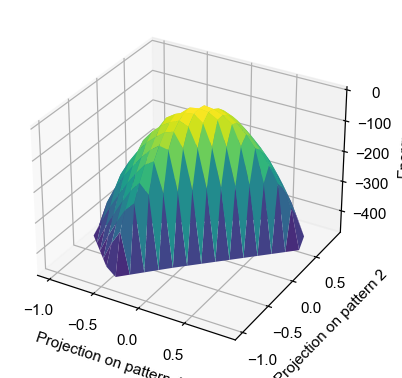

In [8]:
# define a grid on which we can interpolate the surface
xg = np.arange(min(proj_on_1_list), max(proj_on_1_list), 0.1)
yg = np.arange(min(proj_on_2_list), max(proj_on_2_list), 0.1)
xg, yg = np.meshgrid(xg, yg)

# interpolate the data points
zg = griddata((proj_on_1_list, proj_on_2_list), energy_list, (xg, yg))

# Create a colormap
cmap = plt.cm.get_cmap('viridis')

# create a 3D plot
fig = plt.figure(dpi=110, figsize=(3.5, 3.5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, zg, cmap=cmap)
ax.set_xlabel('Projection on pattern 1')
ax.set_ylabel('Projection on pattern 2')
ax.set_zlabel('Energy')

fig.tight_layout()

# fig.savefig('interpolated_surface_unsimilar_patterns.png', dpi=300, bbox_inches='tight')

(2, 6400)
3020


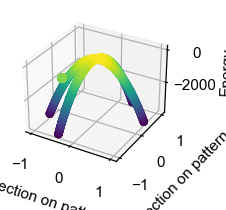

In [9]:
## trying to animate a point moving on the energy surface as the network tries to converge

# load the puppy images
puppy1 = Image.open('puppy_200.jpg')
puppy2 = Image.open('puppy2_200.jpg')

# resize the images to 50,50
puppy1 = puppy1.resize((80,80))
puppy2 = puppy2.resize((80,80))

# convery to greyscale
puppy1 = puppy1.convert('L')
puppy2 = puppy2.convert('L')


# Convert to binary
puppy1 = np.where(puppy1 > np.max(puppy1)/1.6, 1, -1)
puppy2 = np.where(puppy2 > np.max(puppy2)/1.6, 1, -1)

# stack the patterns
puppy_input = np.stack((puppy1.flatten(), puppy2.flatten()))
print(puppy_input.shape)

# initialize a Hopfield network with these puppy memories
h_pup = Hopfield_Net(puppy_input)

# define an array that specifies the fraction of pixels flipped
f_array = np.arange(0., 1.01, 0.01)

# define iterations for each run
itr = 10

# create an array to store the energies
energy_list = []


# create an empty array to store the projections
proj_on_1_list = []
proj_on_2_list = []

## Going one pattern at a time
for i in range(itr):
    for f1 in f_array:
        # flip bits
        corr_p1 = corrupt_input(puppy_input[0,:], f1)

        # project corr_p1 on p1
        proj1_1 = np.dot(puppy_input[0,:], corr_p1)/(linalg.norm(puppy_input[0,:])*linalg.norm(corr_p1))
        # project corr_p1 on p2
        proj1_2 = np.dot(puppy_input[1,:], corr_p1)/(linalg.norm(puppy_input[1,:])*linalg.norm(corr_p1))
        # compute the energy of corr_p1
        e1 = h_pup.compute_energy(corr_p1)
        # append to the right arrays
        proj_on_1_list.append(proj1_1)
        proj_on_2_list.append(proj1_2)
        energy_list.append(e1)

## Going one pattern at a time
for i in range(itr):
    for f2 in f_array:
        # flip bits
        corr_p2 = corrupt_input(puppy_input[1,:], f2)

        # project corr_p1 on p1
        proj1_1 = np.dot(puppy_input[0,:], corr_p2)/(linalg.norm(puppy_input[0,:])*linalg.norm(corr_p2))
        # project corr_p1 on p2
        proj1_2 = np.dot(puppy_input[1,:], corr_p2)/(linalg.norm(puppy_input[1,:])*linalg.norm(corr_p2))
        # compute the energy of corr_p1
        e2 = h_pup.compute_energy(corr_p2)
        # append to the right arrays
        proj_on_1_list.append(proj1_1)
        proj_on_2_list.append(proj1_2)
        energy_list.append(e2)

# repeat for random inputs -- noise basically! -- just adds points near the top :(
for i in range(1000):
    # pick other patterns and check their projections
    rand_pattern = rnd.rand(puppy_input.shape[1])
    # rand_pattern = rand_pattern[0, :]
    # corr_p2 = corrupt_input(rand_pattern, f2)

    # project corr_p2 on p1
    proj1_1 = np.dot(puppy_input[0,:], rand_pattern)/(linalg.norm(puppy_input[0,:])*linalg.norm(rand_pattern))
    # project corr_p2 on p2
    proj1_2 = np.dot(puppy_input[1,:], rand_pattern)/(linalg.norm(puppy_input[1,:])*linalg.norm(rand_pattern))
    # compute the energy of corr_p1
    e2 = h_pup.compute_energy(rand_pattern)
    # append to the right arrays
    proj_on_1_list.append(proj1_1)
    proj_on_2_list.append(proj1_2)
    energy_list.append(e2)

print(len(proj_on_1_list))
proj_on_1_list = np.array(proj_on_1_list)
proj_on_2_list = np.array(proj_on_2_list)
energy_list = np.array(energy_list)

fig = plt.figure(dpi=110, figsize=(5, 5))
ax = fig.add_subplot(321, projection='3d')
ax.scatter(proj_on_1_list, proj_on_2_list, energy_list, c=energy_list)
ax.set_xlabel('Projection on pattern 1')
ax.set_ylabel('Projection on pattern 2')
ax.set_zlabel('Energy')
fig.tight_layout()

# fig, ax = plt.subplots(1,2)
# ax[0].imshow(puppy1)
# ax[1].imshow(puppy2)


plt.show()

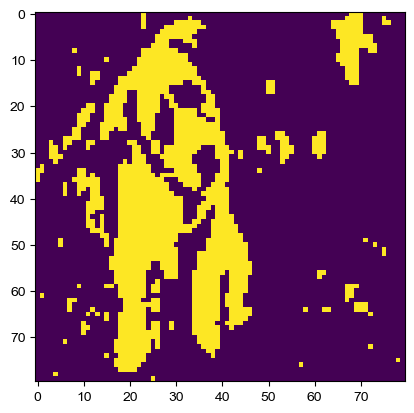

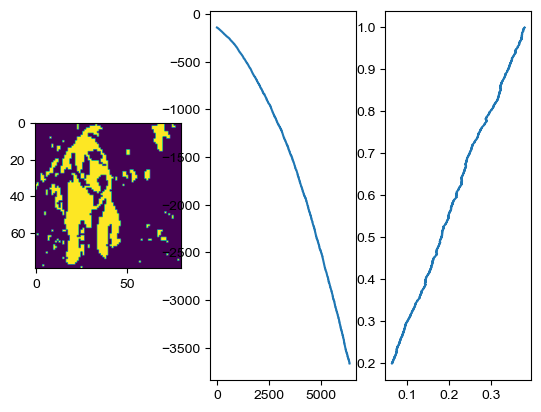

In [73]:
## animating a trajectory on this surface
# pick puppy 1, flip 40% of the bits and monitor convergence
pup1_input = corrupt_input(puppy_input[0,:], 0.4)

# initialize a Hopfield network with these puppy memories
h_pup = Hopfield_Net(puppy_input, init_state=pup1_input)

# pick random neuron at a time to update its state w/o replacement
rand_neuron_idx = rnd.choice(pup1_input.shape[0], size=pup1_input.shape[0], replace=False)

# initialize an energy matrix
energy_pup1 = []
# append the starting value to the energy list
energy_pup1.append(h_pup.compute_energy(pup1_input))

# initialize projection arrays
proj_on_p1 = []
proj_on_p2 = []

# compute the inital projection
p1_init = np.dot(puppy_input[0,:], h_pup.neuron_states)/(linalg.norm(puppy_input[0,:])*linalg.norm(h_pup.neuron_states))
proj_on_p1.append(p1_init)
p2_init = np.dot(puppy_input[1,:], h_pup.neuron_states)/(linalg.norm(puppy_input[1,:])*linalg.norm(h_pup.neuron_states))
proj_on_p2.append(p2_init)



# initialize and empty list to store te images
ims = []
# store the first state matrix
im = plt.imshow(pup1_input.reshape(80, 80))
ims.append([im])

# store att the states in a 6400x6400 matrix
pup_state_mat = np.empty([puppy_input.shape[1], puppy_input.shape[1]])

# start the loop and keep appending the images and the energy points
for r, i in zip(rand_neuron_idx, np.arange(rand_neuron_idx.shape[0])):
    up_state, up_energy = h_pup.update_neuron_state(r)
    pup_state_mat[i, :] = up_state
    im = plt.imshow(up_state.reshape(80,80), animated=True)
    ims.append([im])
    energy_pup1.append(up_energy)
    p1_init = np.dot(puppy_input[0,:], h_pup.neuron_states)/(linalg.norm(puppy_input[0,:])*linalg.norm(h_pup.neuron_states))
    proj_on_p1.append(p1_init)
    p2_init = np.dot(puppy_input[1,:], h_pup.neuron_states)/(linalg.norm(puppy_input[1,:])*linalg.norm(h_pup.neuron_states))
    proj_on_p2.append(p2_init)

proj_on_p1 = np.array(proj_on_p1)
proj_on_p2 = np.array(proj_on_p2)
energy_pup1 = np.array(energy_pup1)

fig, ax = plt.subplots(1,3)
ax[0].imshow(up_state.reshape(80,80))
ax[1].plot(energy_pup1)
ax[2].plot(proj_on_p2, proj_on_p1)

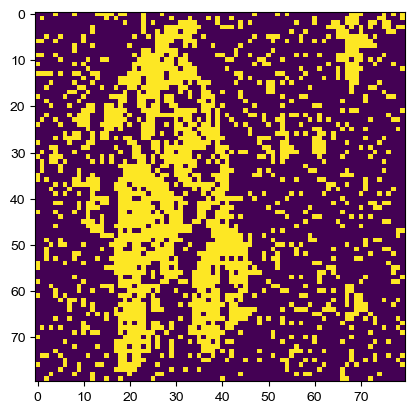

In [51]:
plt.imshow(pup_state_mat[4000,:].reshape(80,80))

In [52]:
proj_on_p1 = np.array(proj_on_p1)
proj_on_p2 = np.array(proj_on_p2)
energy_pup1 = np.array(energy_pup1)

/var/folders/ll/h6rw2gtd69710246lczqf90c0000gn/T/ipykernel_4196/2178432275.py:26: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)
/var/folders/ll/h6rw2gtd69710246lczqf90c0000gn/T/ipykernel_4196/2178432275.py:26: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)


0
0
0
0
64
129
193
258
323
387
452
517
581
646
711
775
840
904
969
1034
1098
1163
1228
1292
1357
1422
1486
1551
1615
1680
1745
1809
1874
1939
2003
2068
2133
2197
2262
2326
2391
2456
2520
2585
2650
2714
2779
2844
2908
2973
3037
3102
3167
3231
3296
3361
3425
3490
3555
3619
3684
3748
3813
3878
3942
4007
4072
4136
4201
4266
4330
4395
4459
4524
4589
4653
4718
4783
4847
4912
4977
5041
5106
5170
5235
5300
5364
5429
5494
5558
5623
5688
5752
5817
5881
5946
6011
6075
6140
6205
6269
6334
6399


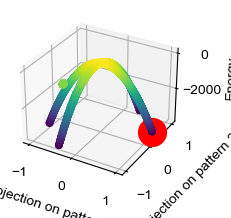

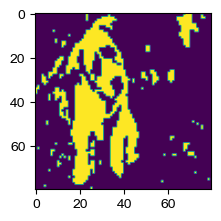

In [99]:
## write the animation functions: we need the projection arrays for this

# convert the energy_pup1 to numpy array
energy_pup1 = np.array(energy_pup1)


def anim_update_state(frame):
    return ims[frame]



fig1 = plt.figure(figsize=(5, 5))
ax1 = fig1.add_subplot(121, projection='3d')
ax1.scatter(proj_on_1_list, proj_on_2_list, energy_list, c=energy_list)
ax1.set_xlabel('Projection on pattern 1')
ax1.set_ylabel('Projection on pattern 2')
ax1.set_zlabel('Energy', rotation=180)

# initialize the point
point, = ax1.plot([], [], [], marker='o', c='r', markersize=20)

def anim_update_energy(frame):
    x = proj_on_p1[frame]
    y = proj_on_p2[frame]
    z = energy_pup1[frame]
    point.set_data(x, y)
    point.set_3d_properties(z)
    return point,

anim1 = animation.FuncAnimation(fig1, anim_update_energy, frames= np.int16(np.linspace(0, energy_pup1.shape[0]-1,100)), interval=50, blit=True)
anim1.save('puppy_energy_trajectory2.mp4')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(122)

# initialize an empty image
im = ax.imshow(np.empty((80, 80)), animated=True)

# animate the heatmap
def anim_update_state2(frame):
    print(frame)
    image = pup_state_mat[frame, :].reshape((80,80))
    # print("Image data:", image)
    im.set_data(image)
    return [im]

anim = animation.FuncAnimation(fig, anim_update_state2, frames = np.linspace(0, 6399, 100, dtype=np.int32), interval=50, blit=True)

anim.save('puppy_state_trajectory2.mp4')
ax.imshow(pup_state_mat[-1, :].reshape(80,80))
plt.show()


0
0
0
0
64
129
193
258
323
387
452
517
581
646
711
775
840
904
969
1034
1098
1163
1228
1292
1357
1422
1486
1551
1615
1680
1745
1809
1874
1939
2003
2068
2133
2197
2262
2326
2391
2456
2520
2585
2650
2714
2779
2844
2908
2973
3037
3102
3167
3231
3296
3361
3425
3490
3555
3619
3684
3748
3813
3878
3942
4007
4072
4136
4201
4266
4330
4395
4459
4524
4589
4653
4718
4783
4847
4912
4977
5041
5106
5170
5235
5300
5364
5429
5494
5558
5623
5688
5752
5817
5881
5946
6011
6075
6140
6205
6269
6334
6399


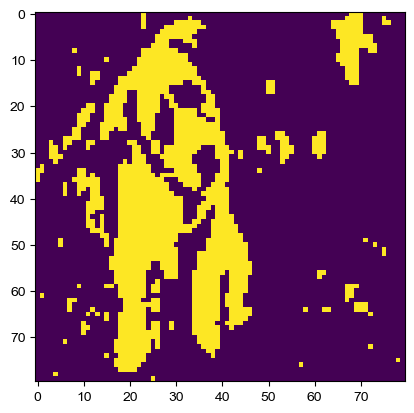

In [98]:
fig, ax = plt.subplots()

# initialize an empty image
im = ax.imshow(np.empty((80, 80)), animated=True)

# animate the heatmap
def anim_update_state2(frame):
    print(frame)
    image = pup_state_mat[frame, :].reshape((80,80))
    # print("Image data:", image)
    im.set_data(image)
    return [im]

anim = animation.FuncAnimation(fig, anim_update_state2, frames = np.linspace(0, 6399, 100, dtype=np.int32), interval=50, blit=True)

anim.save('puppy_state_trajectory.mp4')
ax.imshow(pup_state_mat[-1, :].reshape(80,80))
plt.show()

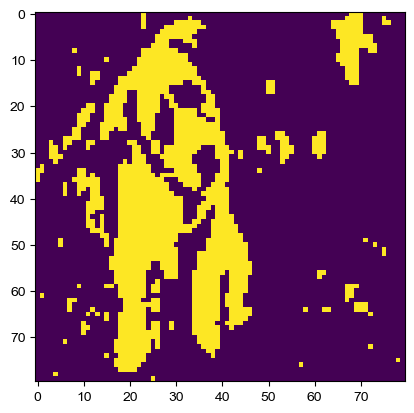

In [87]:
plt.imshow(pup_state_mat[-1, :].reshape(80,80))

In [96]:
print(np.linspace(0, 6399, 100, dtype=np.int32))

[   0   64  129  193  258  323  387  452  517  581  646  711  775  840
  904  969 1034 1098 1163 1228 1292 1357 1422 1486 1551 1615 1680 1745
 1809 1874 1939 2003 2068 2133 2197 2262 2326 2391 2456 2520 2585 2650
 2714 2779 2844 2908 2973 3037 3102 3167 3231 3296 3361 3425 3490 3555
 3619 3684 3748 3813 3878 3942 4007 4072 4136 4201 4266 4330 4395 4459
 4524 4589 4653 4718 4783 4847 4912 4977 5041 5106 5170 5235 5300 5364
 5429 5494 5558 5623 5688 5752 5817 5881 5946 6011 6075 6140 6205 6269
 6334 6399]


# Testing Grounds

In [ ]:
## TESTING GROUND

# check if the corrupt_mem function is working
cp1 = corrupt_input(pattern1, 0)

plt.imshow(cp1.reshape(28,28))

In [ ]:
x = np.arange(0., 10., 0.1)
y = np.arange(0., 20., 0.1)

X, Y = np.meshgrid(x, y)
print(X.shape, Y.shape)

Z = np.sin(X) + np.cos(Y)
print(Z.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
# ax.plot_surface(proj_on_1_list, proj_on_2_list, energy_list)
plt.show()

In [ ]:
P1, P2 = np.meshgrid(proj_on_1_list, proj_on_2_list)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(P1, P2, energy_list)
# ax.plot_surface(proj_on_1_list, proj_on_2_list, energy_list)
plt.show()

In [ ]:
rand_pattern = pick_patterns(x_bin, 1)
rand_pattern = rand_pattern[0, :]
corr_p1 = corrupt_input(pattern1, f1)
print(rand_pattern.shape)
print(corr_p1.shape)
print(pattern1.shape)
